In [49]:
import warnings

warnings.filterwarnings("ignore", category=FutureWarning)
import requests
import geopandas as gpd

user = "Fernigithub"
repo = "files"

url = f"https://api.github.com/repos/{user}/{repo}/git/trees/main?recursive=1"
r = requests.get(url)
res = r.json()

file_list=[]
for file in res["tree"]:
    file_list.append(file["path"])
    print(file["path"])


Frog_selsey_outwoods.geojson
Julian_neighborhood.geojson
Parton_neighborhood.geojson


In [30]:
from ipywidgets import widgets

checkitems = [widgets.Checkbox(value=False, description=label.split('.')[0]) for label in file_list]
widgets.GridBox(checkitems, layout=widgets.Layout(grid_template_columns="repeat(3, 300px)"))


GridBox(children=(Checkbox(value=False, description='Frog_selsey_outwoods'), Checkbox(value=False, description…

In [50]:

selected_data = []
for j,item in enumerate(checkitems):
    if item.value == True:
      selected_data.append(item.description)

print(selected_data)
links = [str(f'https://raw.githubusercontent.com/Fernigithub/files/main/{x}.geojson') for x in selected_data]
print(links)

for item in links:
  gdf = gdf.append(gpd.read_file(item))

['Julian_neighborhood', 'Parton_neighborhood']
['https://raw.githubusercontent.com/Fernigithub/files/main/Julian_neighborhood.geojson', 'https://raw.githubusercontent.com/Fernigithub/files/main/Parton_neighborhood.geojson']


<AxesSubplot:>

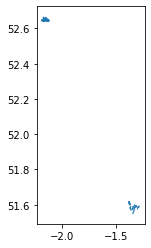

In [51]:
gdf.plot()